In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import mplhep as hep
import pandas as pd
plt.style.use(hep.style.CMS)

In [2]:
df = pd.read_csv('../data/params.txt', delimiter=',', encoding='utf-8')
fitb = df[df['flag'] == 'fitb']
fits = df[df['flag'] == 'fits']
del df

In [3]:
x1 = np.arange(fitb.shape[0])
x2 = x1+0.25

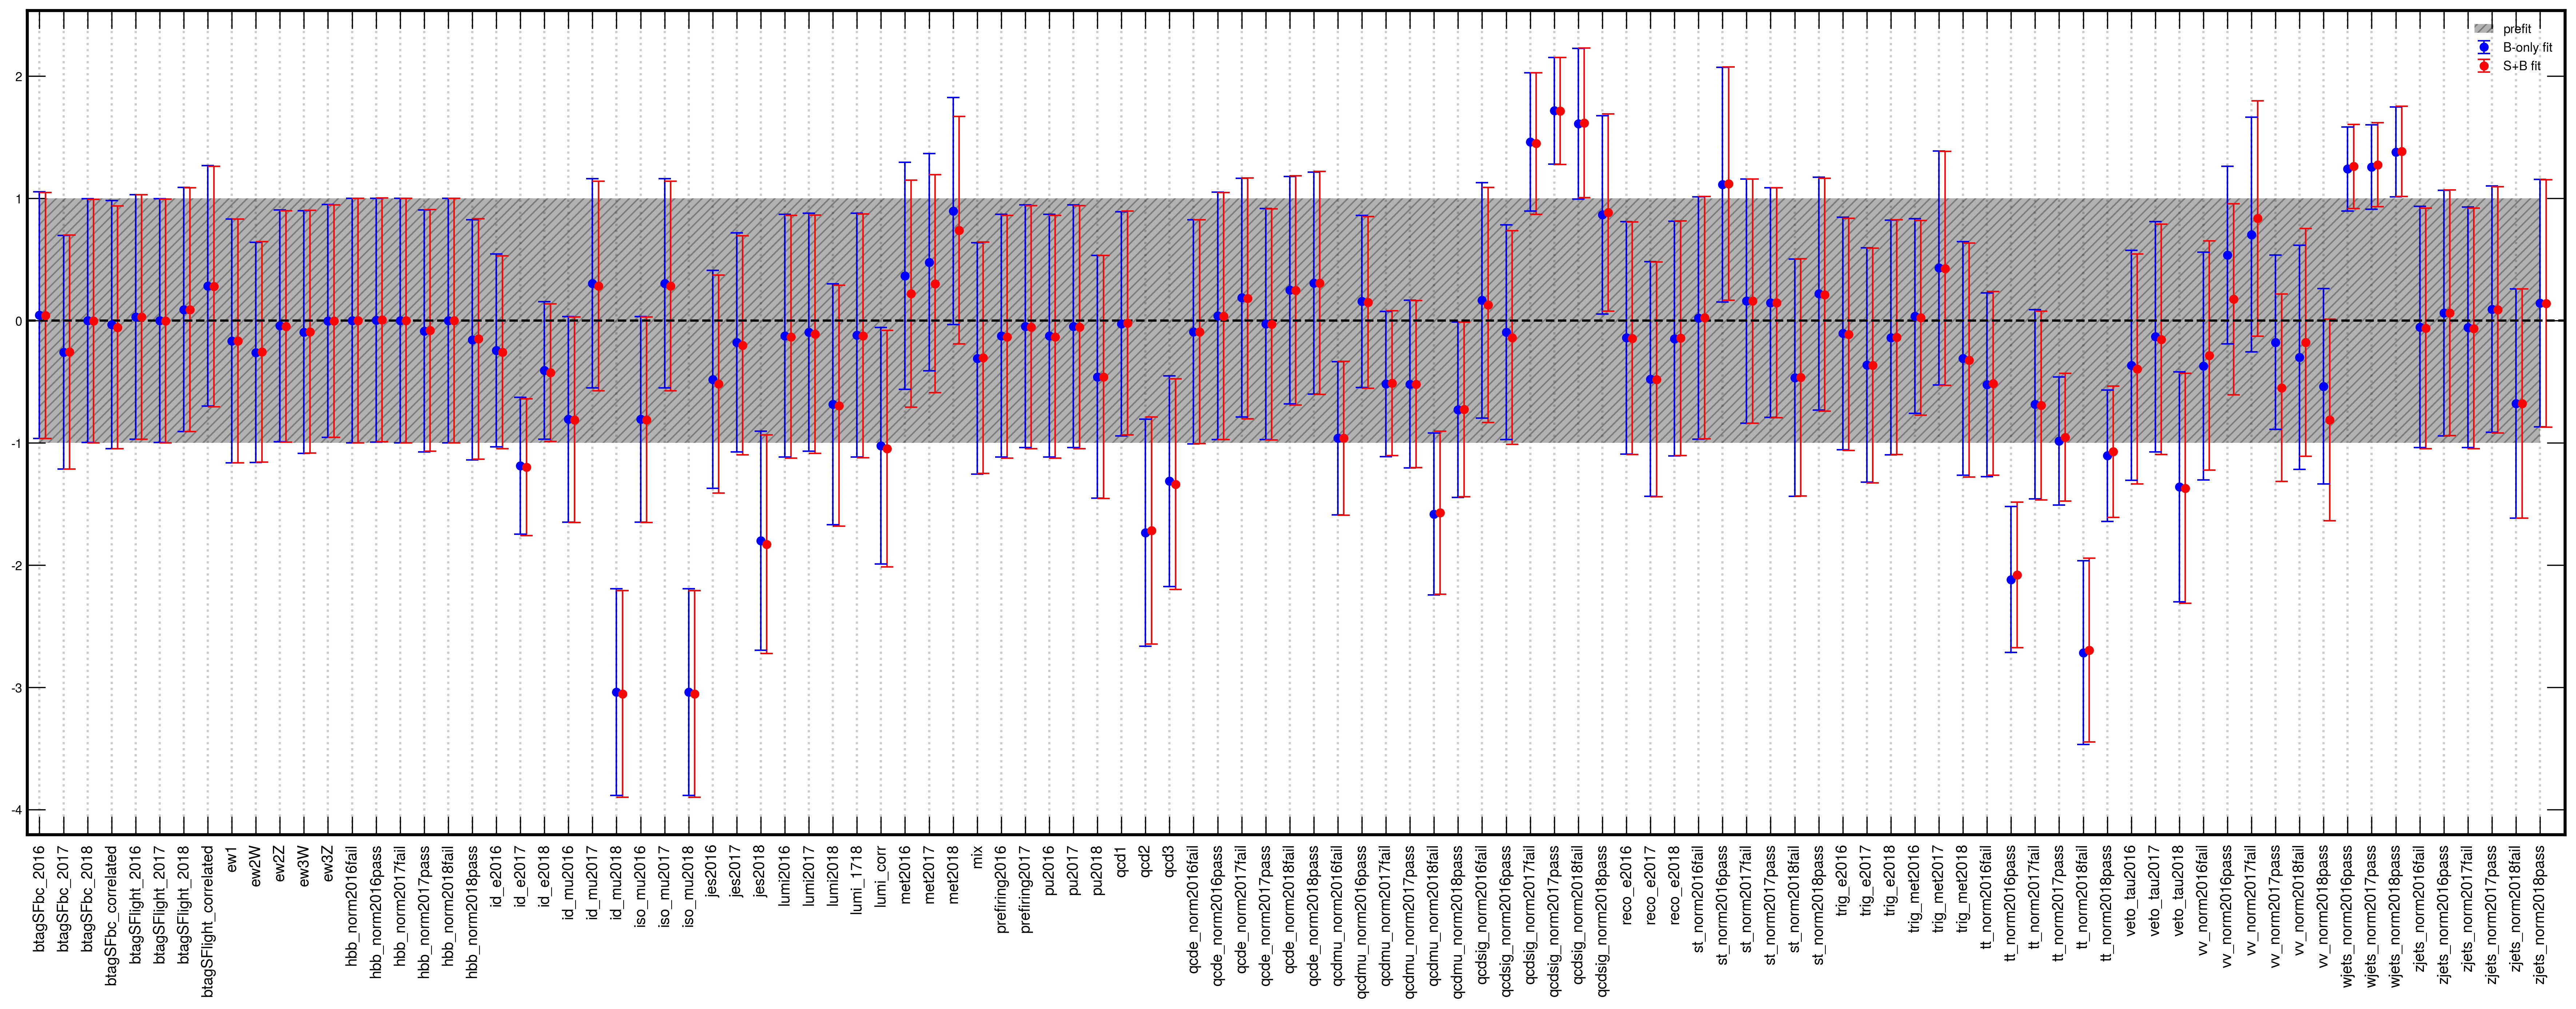

In [5]:
errps = {'hatch':'////', 'facecolor':'none', 'lw': 0, 'color': 'k', 'alpha': 0.3}
err_fitb = {
            "linestyle": "none",
            "marker": ".",
            "markersize": 10.0,
            "elinewidth": 1,
            "color": '#0000FF',
            "capsize": 4,
        }
err_fits = {
            "linestyle": "none",
            "marker": ".",
            "markersize": 10.0,
            "elinewidth": 1,
            "color": '#f90707',
            "capsize": 4,
        }

fig,ax = plt.subplots(dpi=300, figsize=(30,10))

ax.errorbar(x1, fitb['val'], yerr=fitb['err'], **err_fitb, label='B-only fit')
ax.errorbar(x2, fits['val'], yerr=fits['err'], **err_fits, label='S+B fit')
ax.set_xticks(x1)
ax.set_xticklabels(fitb['name'], rotation=90, fontsize=10)
ax.minorticks_off()
ax.fill_between(x1, -1, 1, **errps, label='prefit')
ax.axhline(0, ls='--', color='k')
ax.set_xlim(-0.5, fitb.shape[0]+0.05)
for xcoor in x1:
    ax.axvline(x=xcoor, linestyle='dotted', color='k', alpha=0.2)
ax.legend(loc='upper right')

os.system('mkdir -p ../plots/darkhiggs/results/')
plot_path = os.path.abspath('../plots/darkhiggs/results/')
plot_name = 'pulls.png'
fig.savefig(os.path.join(plot_path, plot_name))